In [36]:
# data link https://archive.ics.uci.edu/dataset/162/forest+fires
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
from sklearn.compose import ColumnTransformer
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

dataset_file = 'D:\\Projects\\Software_Engineering\\Artificial_Intelligence\\Cellula_Internship\\Computer_Vision\\Datasets\\forest+fires\\forestfires.csv'

In [37]:
data = pd.read_csv(dataset_file)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [38]:
min_area = data['area'].min()
max_area = data['area'].max()

print('Min value = ', min_area, '\nMax value = ', max_area)

Min value =  0.0 
Max value =  1090.84


In [39]:
data.shape

(517, 13)

In [40]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)
print('train_data shape = ', train_data.shape)
print('test_data shape = ', test_data.shape)


train_data shape =  (361, 13)
test_data shape =  (156, 13)


<Axes: xlabel='month'>

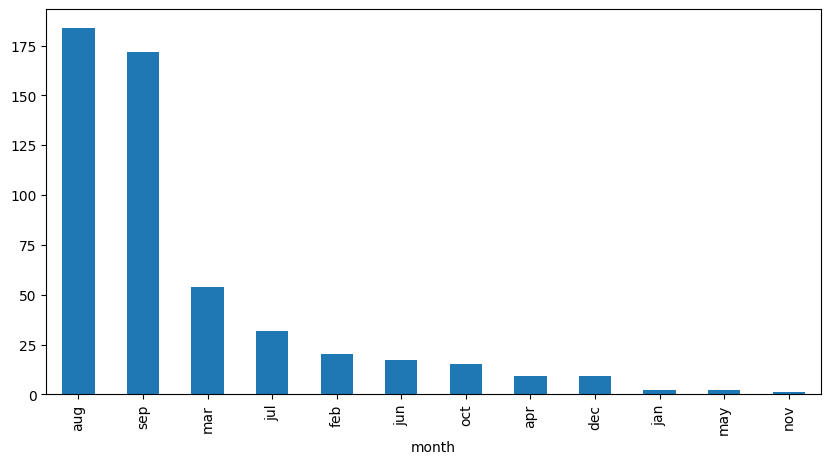

In [41]:
data['month'].value_counts().plot(kind='bar', figsize=(10,5))

<Axes: xlabel='Days', ylabel='No. of fires'>

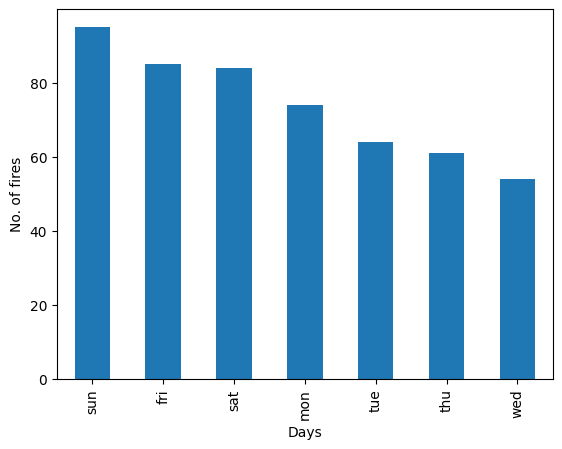

In [42]:
data['day'].value_counts().plot(xlabel='Days', ylabel='No. of fires', kind='bar')

<Axes: xlabel='area', ylabel='Density'>

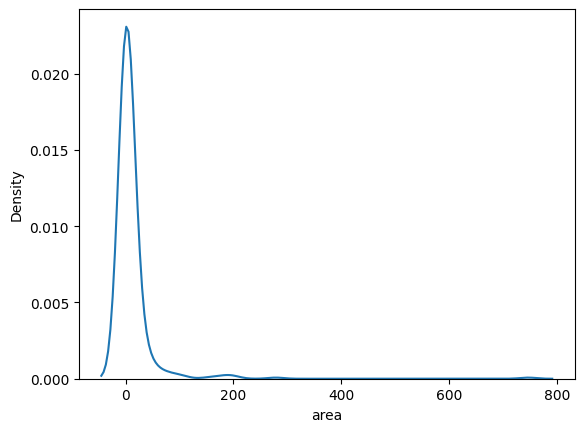

In [43]:
sns.kdeplot(data=train_data['area'])

In [44]:
def get_features_and_label(data, label):
    data_features = data.drop(label, axis=1)
    data_label = data[label]

    return data_features, data_label

In [45]:
train_features, train_label = get_features_and_label(train_data, 'area')
test_features, test_label = get_features_and_label(test_data, 'area')

In [46]:
numerical_features = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
categorical_features = ['month', 'day']

final_pipe = ColumnTransformer([
        ('StandardScaler', StandardScaler(), numerical_features),
        ('OrdinalEncoder', OrdinalEncoder(), categorical_features)
    ])

train_features_final = final_pipe.fit_transform(train_features)
test_features_final = final_pipe.transform(test_features)
type(train_features_final)

numpy.ndarray

In [47]:
input_shape = train_features_final.shape[1:]
input_shape

(12,)

In [48]:
model = keras.models.Sequential([
    # The first layer must specify the input shape always
    keras.layers.Dense(12, activation='relu', input_shape=input_shape),
    keras.layers.Dense(24, activation='relu'),

    # The last layer usually doesn't have activation function in regression
    keras.layers.Dense(1, activation='sigmoid')
])

# Now we compile the model
model.compile(loss='log_cosh', optimizer='adam')

c:\Users\EngSherifMostafa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 24)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 493 (1.93 KB)

 Trainable params: 493 (1.93 KB)

 Non-trainable params: 0 (0.00 B)

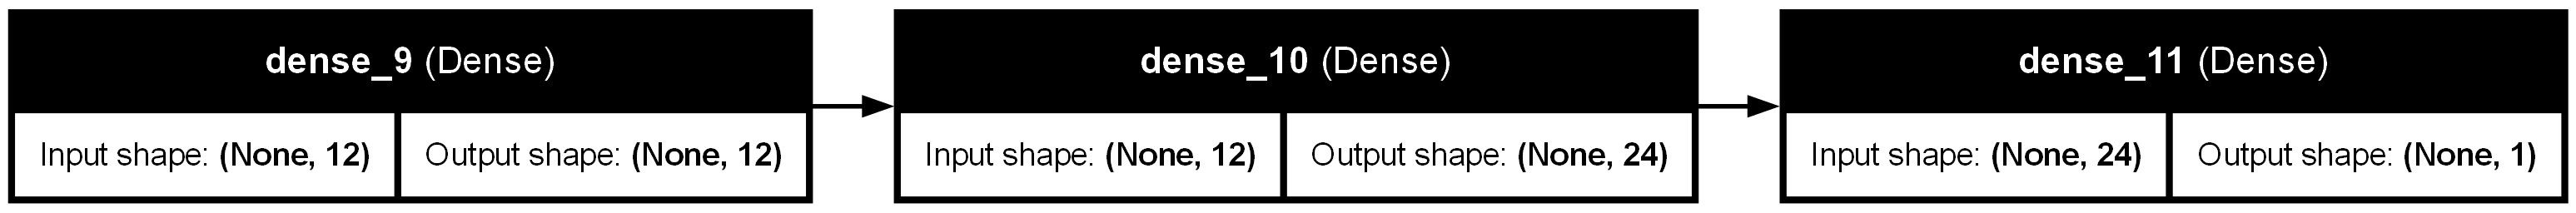

In [50]:
plot_model(model, show_layer_names=True, show_shapes=True, rankdir='LR')

In [51]:
his = model.fit(train_features_final, train_label, validation_data=(test_features_final, test_label), epochs=50)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 11.8648 - val_loss: 14.4110
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.4822 - val_loss: 14.4061
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.6278 - val_loss: 14.4021
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.1691 - val_loss: 14.4007
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.6190 - val_loss: 14.3999
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.7455 - val_loss: 14.3994
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.5825 - val_loss: 14.3990
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.3359 - val_loss: 14.3986
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.7272 - val_loss: 14.3983
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.9296 - val_loss: 14.3980
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.0518 - val_loss: 14.3978
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

In [52]:
model.evaluate(test_features_final, test_label)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15.3639


14.389338493347168

In [53]:
model.save('forest_fire.keras')

In [54]:
loaded_model = keras.models.load_model('forest_fire.keras')